In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '{}/nem-data/nemde_clean/df_DUID_CO2_price.pkl'.format(os.environ['HOME'])
df_DUID_CO2_price = pd.read_pickle(file_path)
df_DUID_CO2_price.head()

,Price,CO2E_EMISSIONS_FACTOR,CO2_group
PeriodID,,,
2018-07-31 23:55:00,70.70204,0.910143,0.89508
2018-07-31 23:50:00,69.24109,0.728114,0.59672
2018-07-31 23:45:00,69.94850,0.910143,0.89508
2018-07-31 23:40:00,74.04497,0.908305,0.89508
2018-07-31 23:35:00,76.44245,0.971761,0.89508


<Figure size 432x288 with 0 Axes>

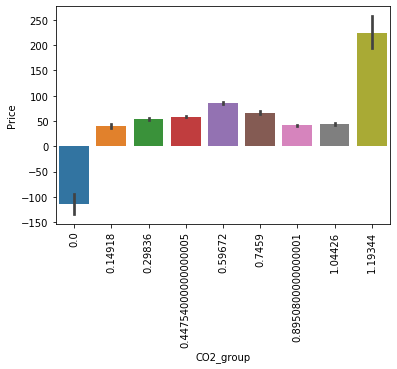

<Figure size 432x288 with 0 Axes>

In [4]:
fig = sns.barplot(df_DUID_CO2_price.CO2_group, df_DUID_CO2_price.Price)
for i in fig.get_xticklabels():
    i.set_rotation(90)
plt.figure()

<Figure size 432x288 with 0 Axes>

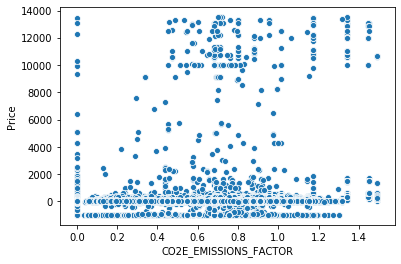

<Figure size 432x288 with 0 Axes>

In [5]:
fig = sns.scatterplot(df_DUID_CO2_price.CO2E_EMISSIONS_FACTOR, df_DUID_CO2_price.Price)
plt.figure()

In [7]:
group_year = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.year).mean()
group_quarter = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.quarter).mean()
group_month = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.month).mean()
group_week = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.week).mean()
group_day = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.day).mean()
group_hour = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.hour).mean()
group_minute = df_DUID_CO2_price.groupby(df_DUID_CO2_price.index.minute).mean()

#quarter: Quarter of the date: Jan-Mar = 1, Apr-Jun = 2, etc.

In [8]:
time_periods = {"year":group_year,"quarter":group_quarter, "month":group_month, "week":group_week,\
                "day":group_day, "hour":group_hour, "minute":group_minute}

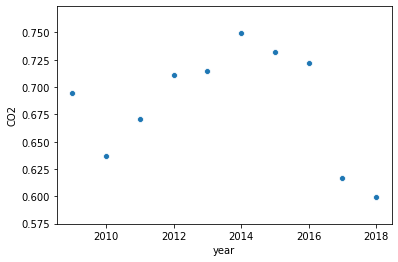

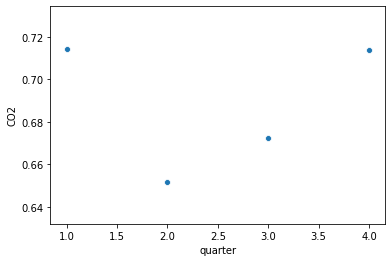

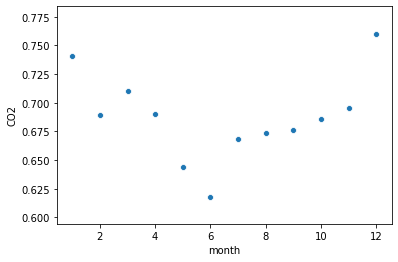

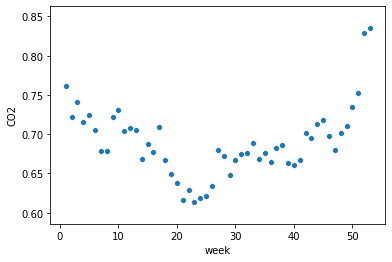

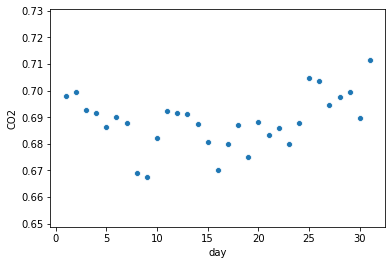

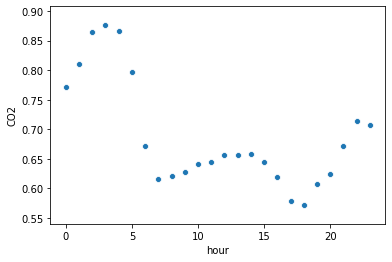

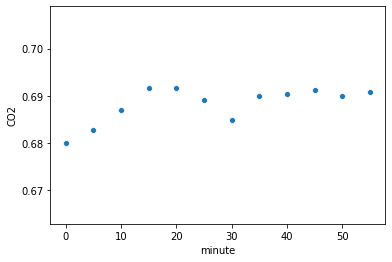

<Figure size 432x288 with 0 Axes>

In [9]:
for i in time_periods:
    fig = sns.scatterplot(time_periods[i].index, time_periods[i].CO2E_EMISSIONS_FACTOR)
    fig.set(xlabel = i, ylabel = "CO2")
    plt.figure()

In [11]:
group_year_month = df_DUID_CO2_price.groupby([df_DUID_CO2_price.index.year, df_DUID_CO2_price.index.month]).mean()
group_year_month

Price  CO2E_EMISSIONS_FACTOR
PeriodID PeriodID                                   
2009     7          27.480607               0.712181
         8          22.782450               0.746957
         9          23.929861               0.714859
         10         28.071345               0.643430
         11        203.403979               0.638252
...                       ...                    ...
2018     3          80.679767               0.642916
         4          85.153025               0.608576
         5          86.869343               0.549339
         6          67.987404               0.767256
         7          92.727312               0.597887

[109 rows x 2 columns]

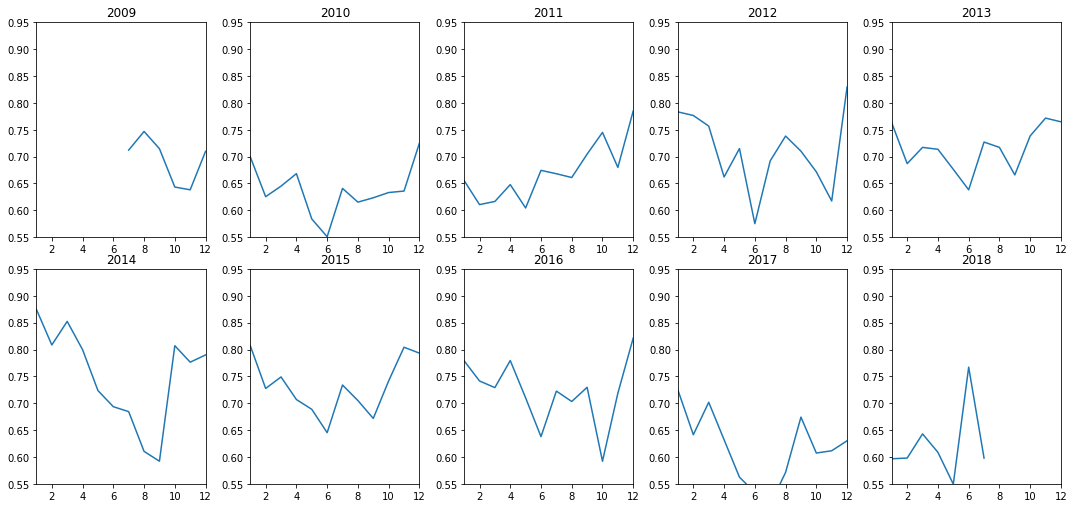

In [13]:
df_unstacked = group_year_month.unstack(level=0).CO2E_EMISSIONS_FACTOR

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,7))
plt.tight_layout()

count_k = 0
for i in range(axes.shape[0]):
    for j in axes[i]:
        j.set_xlim(1,12)
        j.set_ylim(0.55,0.95)
        j.set_xticks(list(range(2,13,2)))
        j.set_title(df_unstacked.columns[count_k])
        j.plot(df_unstacked.index, df_unstacked.iloc[:, count_k])
        count_k += 1